In [42]:
import sys
!{sys.executable} -m pip install missingno

In [43]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [44]:
data = pd.read_csv('heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20.0,1,265000.00,1.9,130.0,1,0,4,1.0
1,55.0,0,7861,0,38.0,0,263358.03,1.1,136.0,1,0,6,1.0
2,65.0,0,146,0,20.0,0,162000.00,NaN,129.0,1,1,7,1.0
3,50.0,1,111,0,20.0,0,210000.00,1.9,137.0,1,0,7,1.0
4,65.0,1,160,1,20.0,0,327000.00,2.7,116.0,0,0,8,1.0


In [45]:
data.shape[0]

299

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         270 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          270 non-null    float64
 8   serum_sodium              270 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               284 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


In [47]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,270.000000,299.000000,299.000000,270.000000,270.000000,299.000000,299.00000,299.000000,284.000000
mean,60.833893,0.431438,581.839465,0.418060,38.214815,0.351171,263358.029264,1.398259,136.537037,0.648829,0.32107,130.260870,0.309859
std,11.894809,0.496107,970.287881,0.494067,11.953992,0.478136,97804.236869,1.058122,4.508204,0.478136,0.46767,77.614208,0.463252
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.00000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,139.000000,1.000000,1.00000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.00000,285.000000,1.000000


In [48]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [49]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                 float64
dtype: object

In [50]:
data.isnull().values.any()

True

In [51]:
data.isnull().sum()

age                          0
anaemia                      0
creatinine_phosphokinase     0
diabetes                     0
ejection_fraction           29
high_blood_pressure          0
platelets                    0
serum_creatinine            29
serum_sodium                29
sex                          0
smoking                      0
time                         0
DEATH_EVENT                 15
dtype: int64

## Data Wrangling and Preprocessing

In [52]:
train_data = data.copy()
train_data.isnull().sum()

age                          0
anaemia                      0
creatinine_phosphokinase     0
diabetes                     0
ejection_fraction           29
high_blood_pressure          0
platelets                    0
serum_creatinine            29
serum_sodium                29
sex                          0
smoking                      0
time                         0
DEATH_EVENT                 15
dtype: int64

In [53]:
columns = np.array(train_data.columns).tolist()
columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [54]:
missingData = train_data[train_data.isnull().any(axis=1)]
missingData.shape

(93, 13)

In [55]:
missingData = missingData.copy()
missingData.drop(columns=['DEATH_EVENT'], inplace=True)

In [56]:
missingData.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [57]:
emptyCols = [col for col in missingData.columns if missingData[col].isnull().any()]
nonEmptyCols = [col for col in missingData.columns if not missingData[col].isnull().any()]
print(emptyCols)
print(nonEmptyCols)

['ejection_fraction', 'serum_creatinine', 'serum_sodium']
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'time']


In [58]:
from sklearn.linear_model import LinearRegression

for col in emptyCols:
    temp = missingData.dropna(subset=[col])
    
    X_train = temp[nonEmptyCols]
    y_train = temp[col]

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(missingData[nonEmptyCols])
    missingData.loc[missingData[col].isnull(), col] = y_pred[missingData[col].isnull()]
    print('Missing values in', col, 'imputed')
    
    nonEmptyCols = [col for col in missingData.columns if not missingData[col].isnull().any()]
    

Missing values in ejection_fraction imputed
Missing values in serum_creatinine imputed
Missing values in serum_sodium imputed


In [59]:
train_data = missingData.copy()
train_data['DEATH_EVENT'] = data['DEATH_EVENT'] 
train_data.isnull().sum()


age                          0
anaemia                      0
creatinine_phosphokinase     0
diabetes                     0
ejection_fraction            0
high_blood_pressure          0
platelets                    0
serum_creatinine             0
serum_sodium                 0
sex                          0
smoking                      0
time                         0
DEATH_EVENT                 15
dtype: int64

## Exploratory Data Analysis


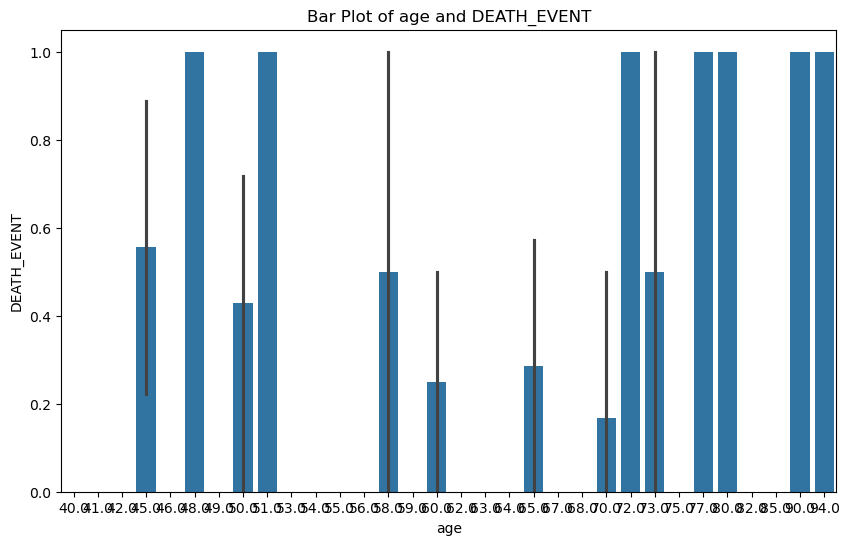

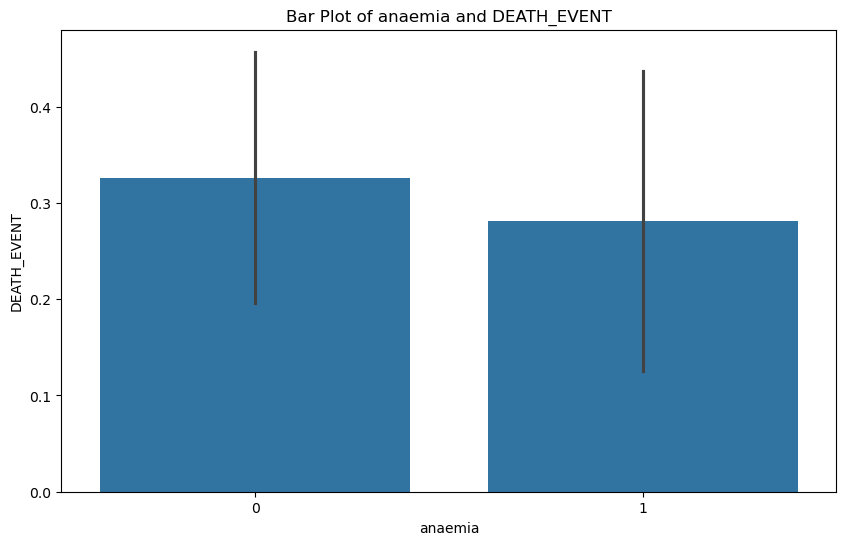

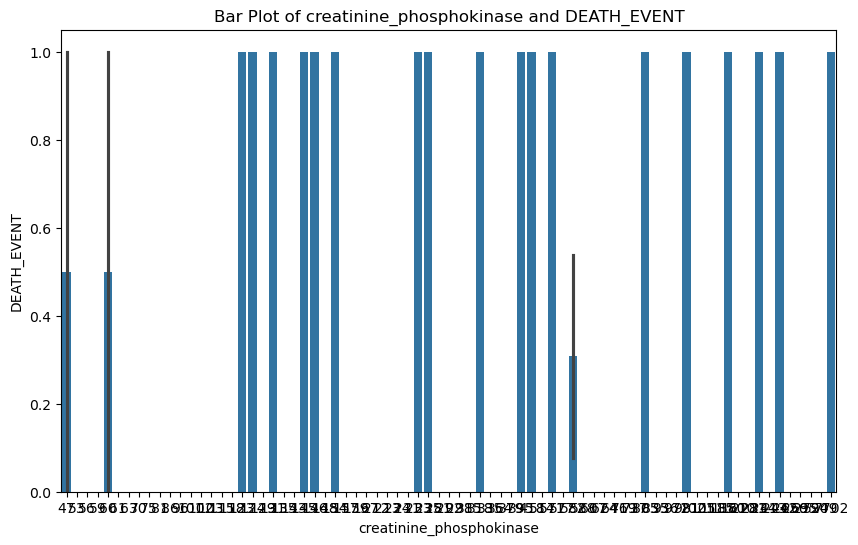

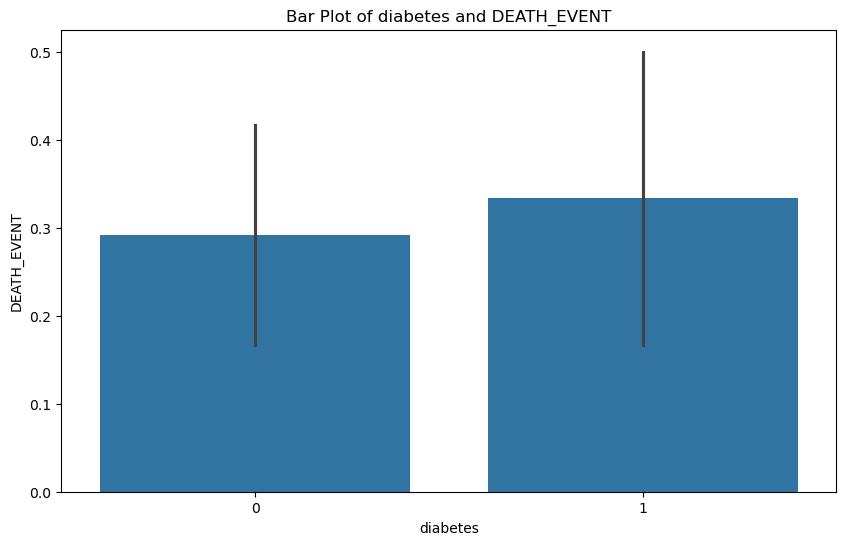

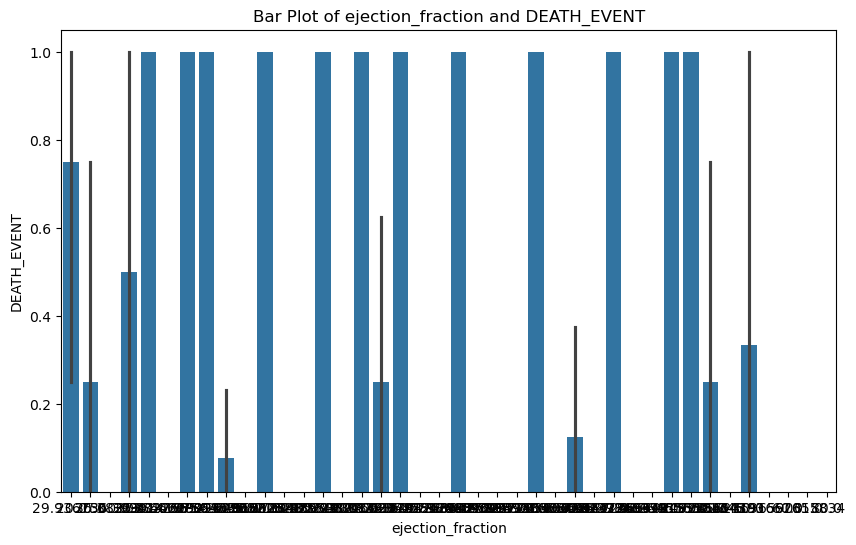

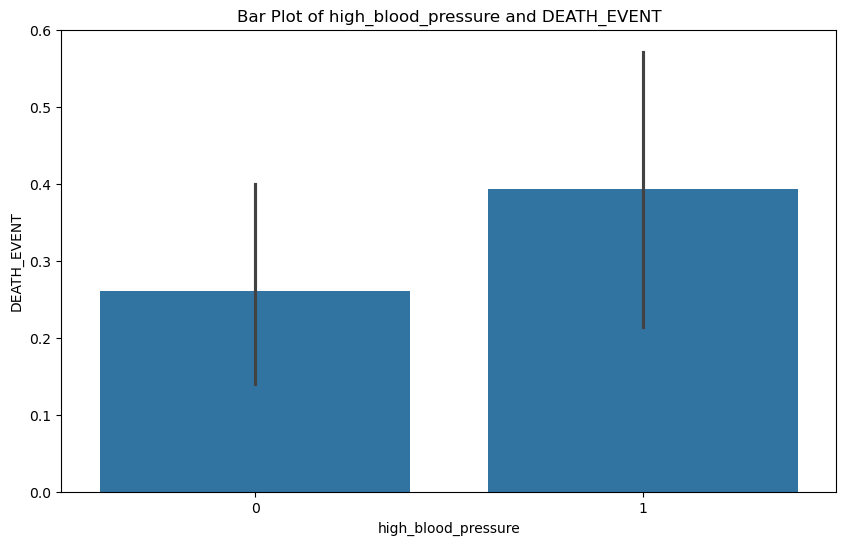

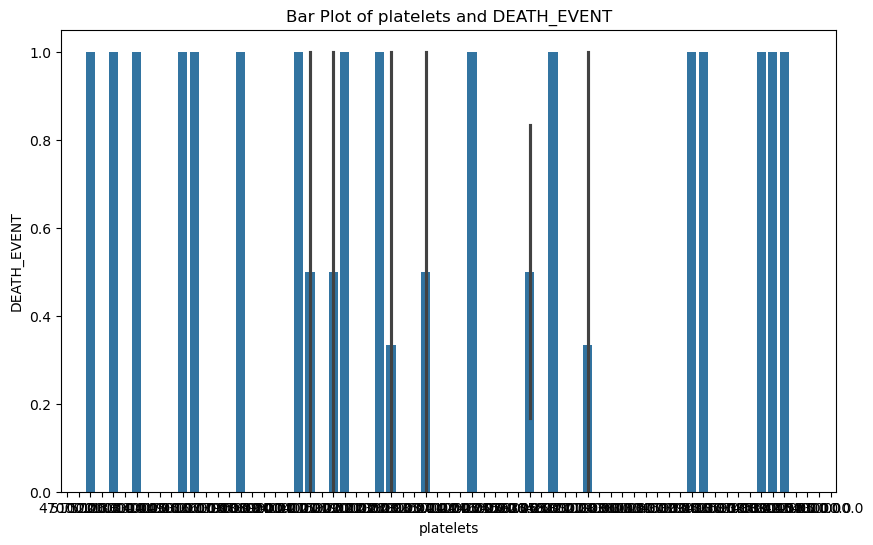

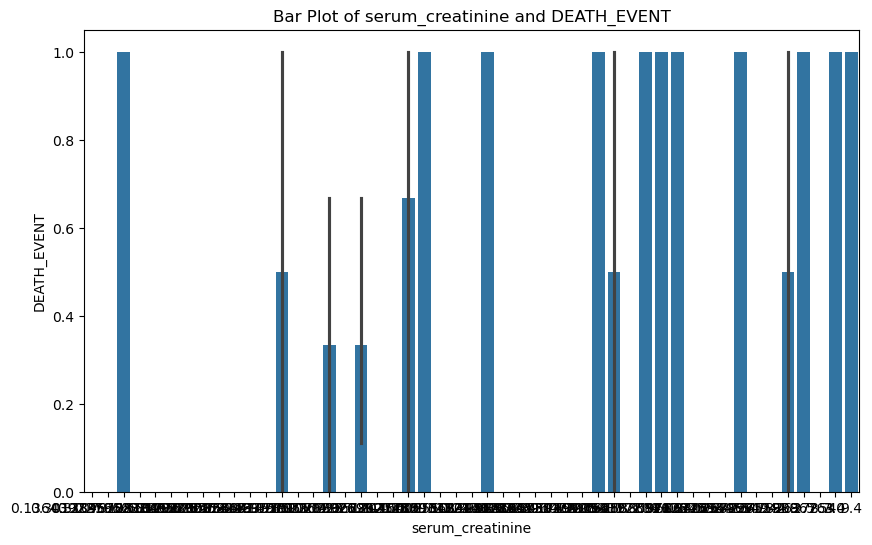

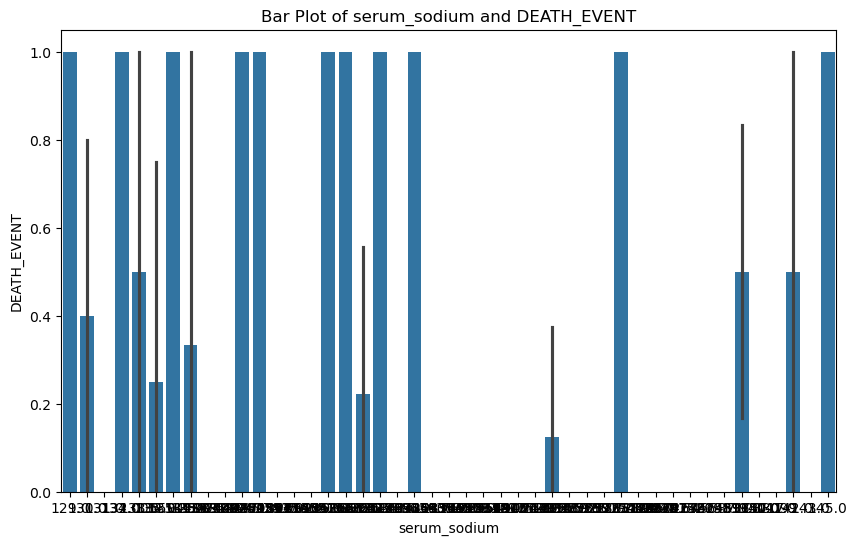

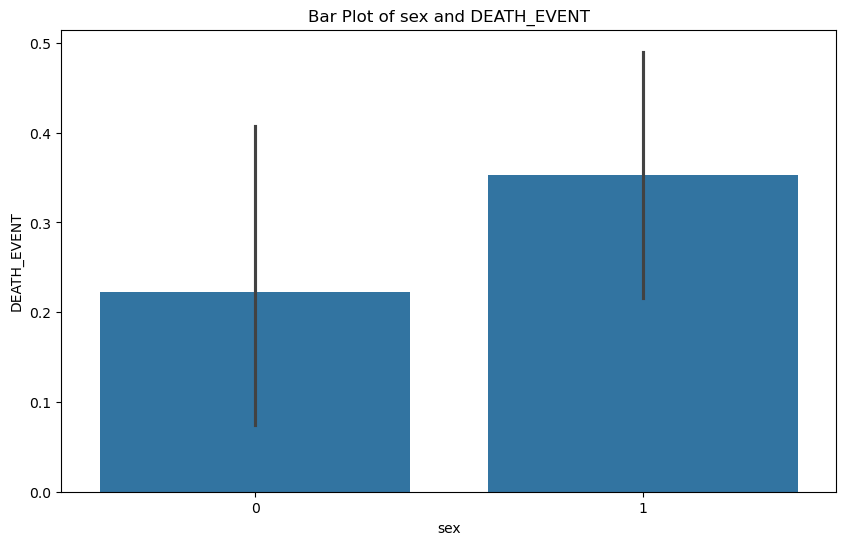

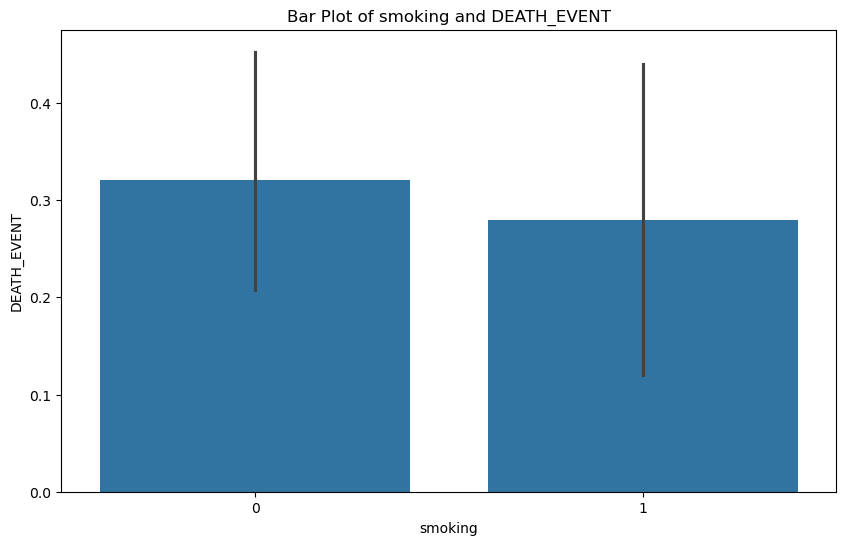

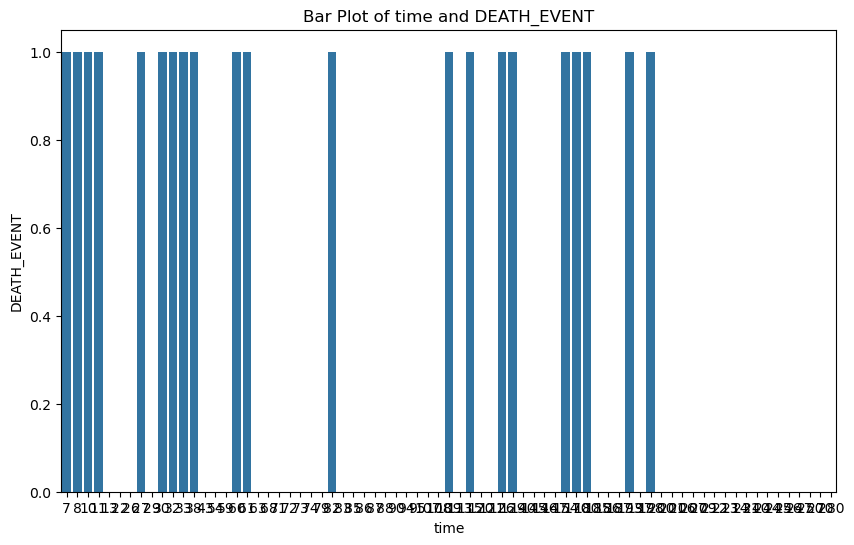

In [60]:
#bar plot
for col in train_data.columns:
    if col != 'DEATH_EVENT':
        plt.figure(figsize=(10, 6))
        sns.barplot(x=col, y='DEATH_EVENT', data=train_data)
        plt.title(f'Bar Plot of {col} and DEATH_EVENT')
        plt.show()

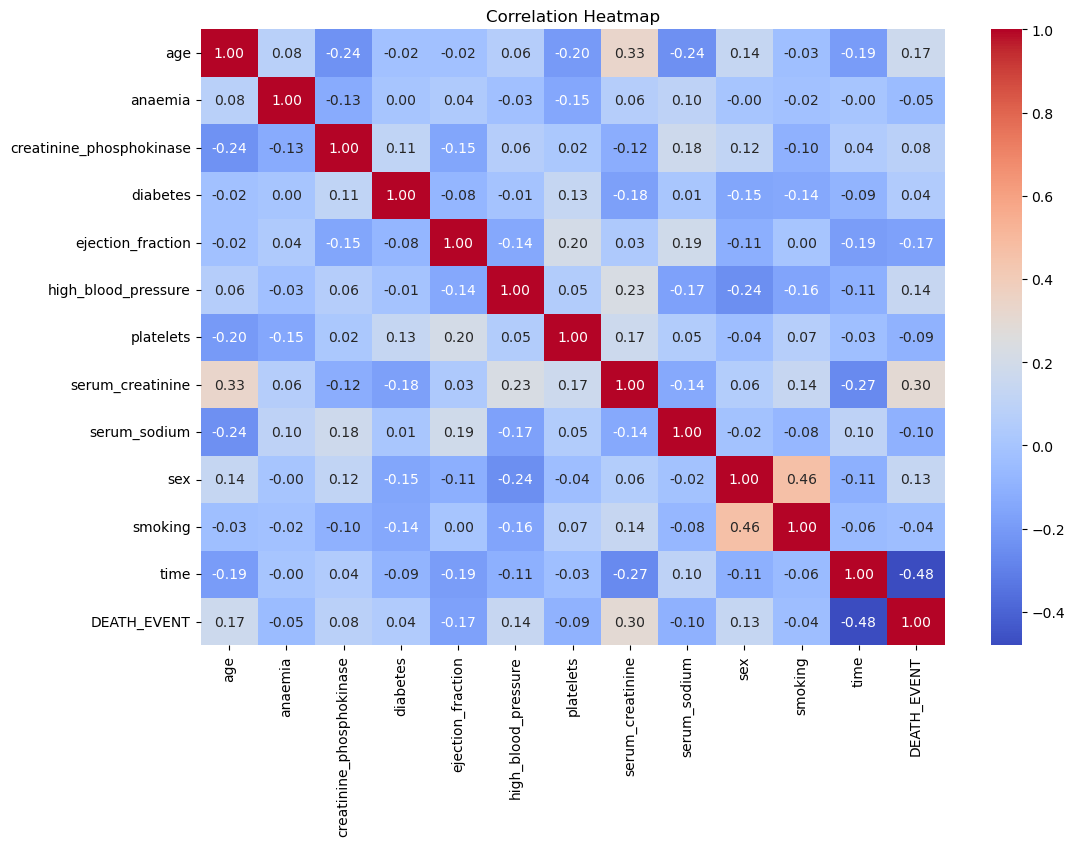

In [61]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 0, 'DEATH_EVENT')

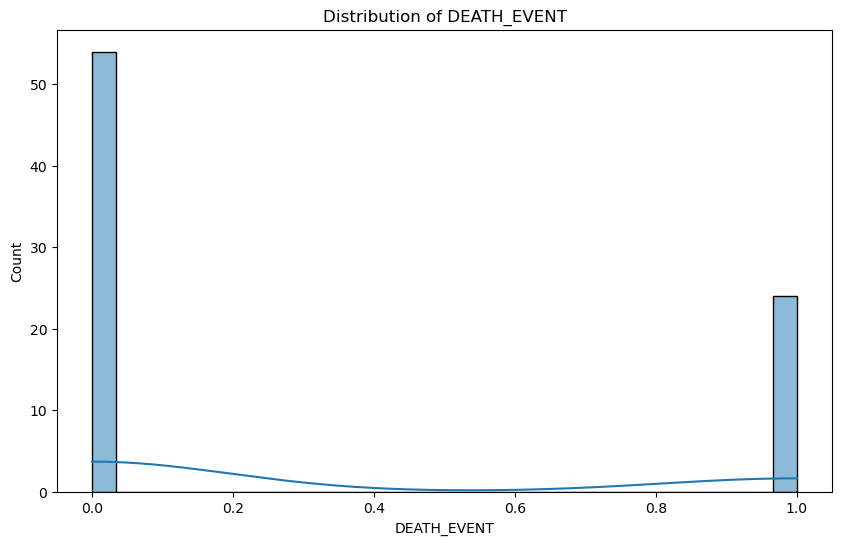

In [62]:
#histplot
plt.figure(figsize=(10, 6))
sns.histplot(train_data['DEATH_EVENT'], kde=True, bins=30)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')

## Feature Selection

In [63]:
train_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Model Training

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
target = train_data['DEATH_EVENT']
features = train_data.drop(columns=['DEATH_EVENT'])

scaledFeatures = scaler.fit_transform(features)
scaledDf = pd.DataFrame(scaledFeatures, columns=features.columns)

In [65]:
trainedData = pd.concat([scaledDf, target.reset_index(drop=True)], axis=1)
# Drop any rows with missing target (if any)
inputData = trainedData[trainedData['DEATH_EVENT'].notnull()]


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split features and target
X = inputData.drop(columns=['DEATH_EVENT'])
y = inputData['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

report_lines = []

# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classifier")
print("Accuracy:", acc_rf)
print(report_rf)
report_lines.append("Random Forest Classifier\n")
report_lines.append(f"Accuracy: {acc_rf}\n")
report_lines.append(report_rf + "\n")

# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression")
print("Accuracy:", acc_lr)
print(report_lr)
report_lines.append("Logistic Regression\n")
report_lines.append(f"Accuracy: {acc_lr}\n")
report_lines.append(report_lr + "\n")

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classifier")
print("Accuracy:", acc_dt)
print(report_dt)
report_lines.append("Decision Tree Classifier\n")
report_lines.append(f"Accuracy: {acc_dt}\n")
report_lines.append(report_dt + "\n")

# Save to report.txt
with open("report.txt", "w") as f:
    f.writelines(report_lines)


Random Forest Classifier
Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.60      0.60      0.60         5

    accuracy                           0.75        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.75      0.75      0.75        16

Logistic Regression
Accuracy: 0.5
              precision    recall  f1-score   support

         0.0       0.67      0.55      0.60        11
         1.0       0.29      0.40      0.33         5

    accuracy                           0.50        16
   macro avg       0.48      0.47      0.47        16
weighted avg       0.55      0.50      0.52        16

Decision Tree Classifier
Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.60      0.60      0.60         5

    accuracy                           0.75        16
   macro avg  

In [67]:
feature_names = X.columns
importances_rf = model_rf.feature_importances_
rf_features = sorted(zip(feature_names, importances_rf), key=lambda x: x[1], reverse=True)

report_lines.append("Feature Importance (Random Forest):\n")
for feature, importance in rf_features:
    report_lines.append(f"{feature}: {importance:.4f}\n")
report_lines.append("\n")

# Feature importance from Decision Tree
importances_dt = model_dt.feature_importances_
dt_features = sorted(zip(feature_names, importances_dt), key=lambda x: x[1], reverse=True)

report_lines.append("Feature Importance (Decision Tree):\n")
for feature, importance in dt_features:
    report_lines.append(f"{feature}: {importance:.4f}\n")
report_lines.append("\n")

# Save updated report
with open("report.txt", "w") as f:
    f.writelines(report_lines)

## Testing and Optimization

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameter grid for classification
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2"]
}

# Initialize classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform grid search using accuracy as scoring
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_acc_cv = grid_search.best_score_
print("Best Cross-Validated Accuracy:", best_acc_cv)

# Evaluate on test set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Random Forest Classifier (Tuned)")
print("Test Accuracy:", acc)
print(report)

# Save to report.txt
with open("report.txt", "a") as f:
    f.write("Best Parameters (Random Forest Classifier):\n")
    f.write(str(best_params) + "\n")
    f.write(f"Best Cross-Validated Accuracy: {best_acc_cv:.4f}\n\n")
    
    f.write("Random Forest Classifier (on Test Set):\n")
    f.write(f"Test Accuracy: {acc:.4f}\n")
    f.write(report + "\n")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\PC\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.8551282051282051
Random Forest Classifier (Tuned)
Test Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.60      0.60      0.60         5

    accuracy                           0.75        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.75      0.75      0.75        16



In [69]:
import pickle
import os

if not os.path.exists('models'):
    os.makedirs('models')

with open('models/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
# Save the scaler
with open('models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
# Save the trained model (Random Forest)
with open('models/trained_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
    
# Save the Linear Regression model
with open('models/linear_model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)
    
# Save the Decision Tree model
with open('models/decision_tree_model.pkl', 'wb') as file: 
    pickle.dump(model_dt, file)